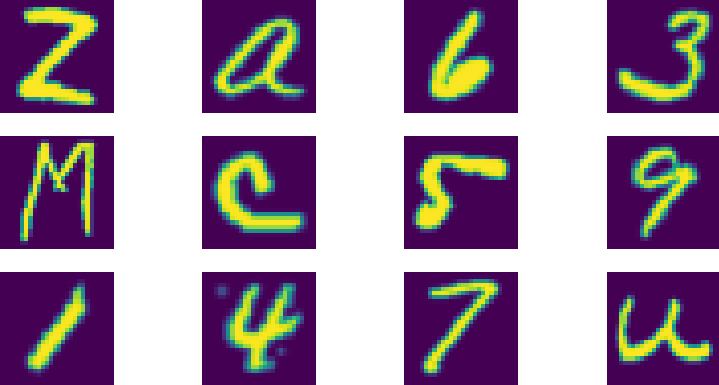

In [1]:

import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [2]:

testing_letter = pd.read_csv("C:\\Users\\DELL\\Downloads\\archive (8)\\emnist-letters-test.csv")
training_letter = pd.read_csv("C:\\Users\\DELL\\Downloads\\archive (8)\\emnist-letters-train.csv")

In [3]:
print(training_letter.shape)
print(testing_letter.shape)

(88799, 785)
(14799, 785)


In [4]:
#training_letters
y1 = np.array(training_letter.iloc[:,0].values)
x1 = np.array(training_letter.iloc[:,1:].values)
#testing_labels
y2 = np.array(testing_letter.iloc[:,0].values)
x2 = np.array(testing_letter.iloc[:,1:].values)
print(y1.shape)
print(x1.shape)

(88799,)
(88799, 784)


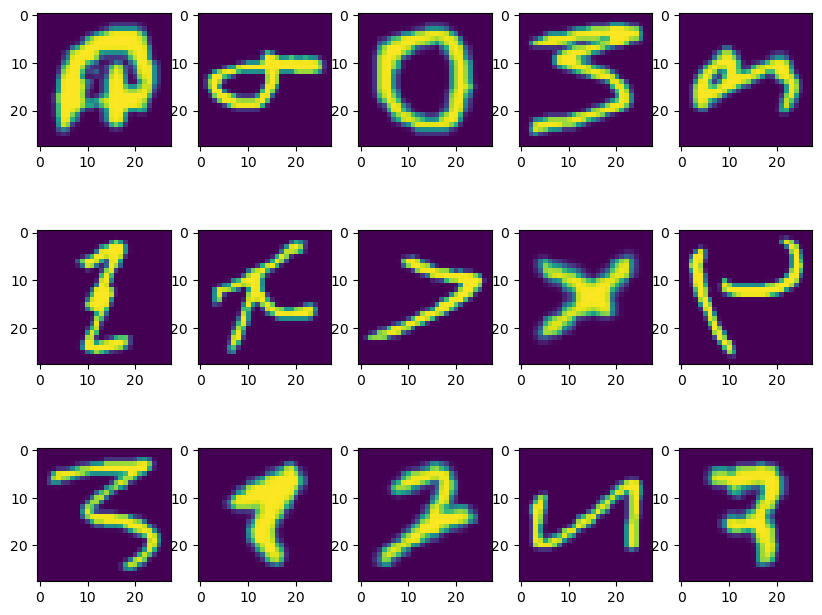

In [5]:
import matplotlib.pyplot as plt 
fig,axes = plt.subplots(3,5,figsize=(10,8))
for i,ax in enumerate(axes.flat):
    ax.imshow(x1[i].reshape([28,28]))


In [7]:
import tensorflow as tf

In [8]:

train_images = x1 / 255.0
test_images = x2 / 255.0

train_images_number = train_images.shape[0]
train_images_height = 28
train_images_width = 28
train_images_size = train_images_height*train_images_width

train_images = train_images.reshape(train_images_number, train_images_height, train_images_width, 1)

test_images_number = test_images.shape[0]
test_images_height = 28
test_images_width = 28
test_images_size = test_images_height*test_images_width

test_images = test_images.reshape(test_images_number, test_images_height, test_images_width, 1)

In [9]:

number_of_classes = 37

y1 = tf.keras.utils.to_categorical(y1, number_of_classes)
y2 = tf.keras.utils.to_categorical(y2, number_of_classes)

In [10]:

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
train_x,test_x,train_y,test_y = train_test_split(train_images,y1,test_size=0.2,random_state = 42)

In [13]:
model = tf.keras.Sequential([ 
    tf.keras.layers.Conv2D(32,3,input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(number_of_classes,activation='softmax')
])

In [14]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
 
MCP = ModelCheckpoint('Best_points.h5',verbose=1,save_best_only=True,monitor='val_accuracy',mode='max')
ES = EarlyStopping(monitor='val_accuracy',min_delta=0,verbose=0,restore_best_weights = True,patience=3,mode='max')
RLP = ReduceLROnPlateau(monitor='val_loss',patience=3,factor=0.2,min_lr=0.0001)

In [16]:
history = model.fit(train_x,train_y,epochs=10,validation_data=(test_x,test_y),callbacks=[MCP,ES,RLP])

Epoch 1/10
2220/2220 [==============================] - ETA: 0s - loss: 0.5527 - accuracy: 0.8279
Epoch 1: val_accuracy improved from -inf to 0.87292, saving model to Best_points.h5
2220/2220 [==============================] - 155s 69ms/step - loss: 0.5527 - accuracy: 0.8279 - val_loss: 0.3852 - val_accuracy: 0.8729 - lr: 0.0010
Epoch 2/10


c:\Users\DELL\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2220/2220 [==============================] - ETA: 0s - loss: 0.2721 - accuracy: 0.9081
Epoch 2: val_accuracy improved from 0.87292 to 0.89803, saving model to Best_points.h5
2220/2220 [==============================] - 151s 68ms/step - loss: 0.2721 - accuracy: 0.9081 - val_loss: 0.3061 - val_accuracy: 0.8980 - lr: 0.0010
Epoch 3/10
2220/2220 [==============================] - ETA: 0s - loss: 0.2047 - accuracy: 0.9280
Epoch 3: val_accuracy improved from 0.89803 to 0.90180, saving model to Best_points.h5
2220/2220 [==============================] - 167s 75ms/step - loss: 0.2047 - accuracy: 0.9280 - val_loss: 0.2942 - val_accuracy: 0.9018 - lr: 0.0010
Epoch 4/10
2220/2220 [==============================] - ETA: 0s - loss: 0.1612 - accuracy: 0.9402
Epoch 4: val_accuracy improved from 0.90180 to 0.90777, saving model to Best_points.h5
2220/2220 [==============================] - 158s 71ms/step - loss: 0.1612 - accuracy: 0.9402 - val_loss: 0.2971 - val_accuracy: 0.9078 - lr: 0.0010
Epoch 5/1

In [17]:
import seaborn as sns

Text(0, 0.5, 'Accuray')

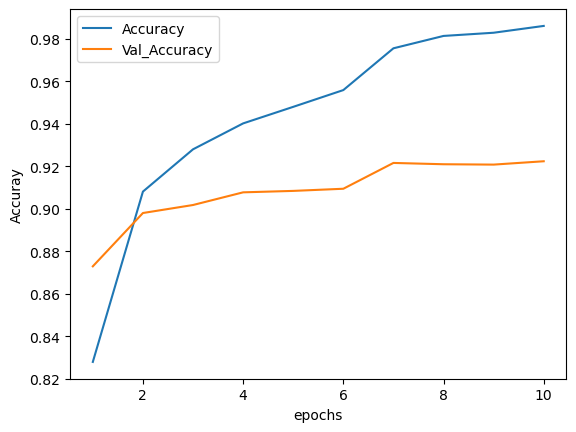

In [18]:
q = len(history.history['accuracy'])

plt.figsize=(10,10)
sns.lineplot(x = range(1,1+q),y = history.history['accuracy'], label='Accuracy')
sns.lineplot(x = range(1,1+q),y = history.history['val_accuracy'], label='Val_Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuray')

In [19]:
train_x2,test_x2,train_y2,test_y2 = train_test_split(train_images,y1,test_size=0.15,random_state = 42)

In [20]:
history1 = model.fit(train_x2,train_y2,epochs=10,validation_data=(test_x2,test_y2))

Epoch 1/10
2359/2359 [==============================] - 178s 75ms/step - loss: 0.0503 - accuracy: 0.9829 - val_loss: 0.3393 - val_accuracy: 0.9221
Epoch 2/10
2359/2359 [==============================] - 167s 71ms/step - loss: 0.0359 - accuracy: 0.9858 - val_loss: 0.3445 - val_accuracy: 0.9230
Epoch 3/10
2359/2359 [==============================] - 201s 85ms/step - loss: 0.0310 - accuracy: 0.9870 - val_loss: 0.3600 - val_accuracy: 0.9216
Epoch 4/10
2359/2359 [==============================] - 221s 94ms/step - loss: 0.0284 - accuracy: 0.9880 - val_loss: 0.3742 - val_accuracy: 0.9218
Epoch 5/10
2359/2359 [==============================] - 194s 82ms/step - loss: 0.0264 - accuracy: 0.9885 - val_loss: 0.3914 - val_accuracy: 0.9220
Epoch 6/10
2359/2359 [==============================] - 192s 81ms/step - loss: 0.0246 - accuracy: 0.9893 - val_loss: 0.4107 - val_accuracy: 0.9227
Epoch 7/10
2359/2359 [==============================] - 186s 79ms/step - loss: 0.0232 - accuracy: 0.9901 - val_loss: 0

Text(0, 0.5, 'Accuray')

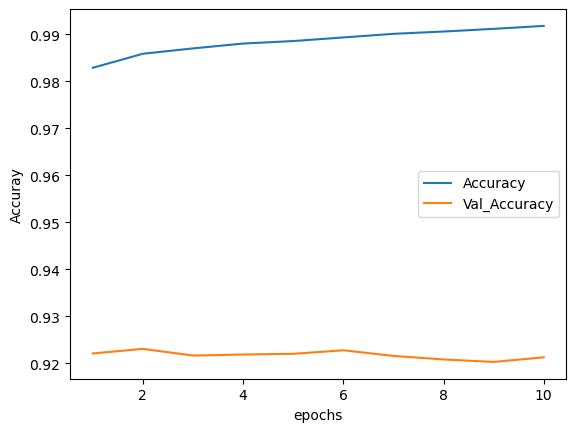

In [21]:
q = len(history1.history['accuracy'])

plt.figsize=(10,10)
sns.lineplot(x = range(1,1+q),y = history1.history['accuracy'], label='Accuracy')
sns.lineplot(x = range(1,1+q),y = history1.history['val_accuracy'], label='Val_Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuray')

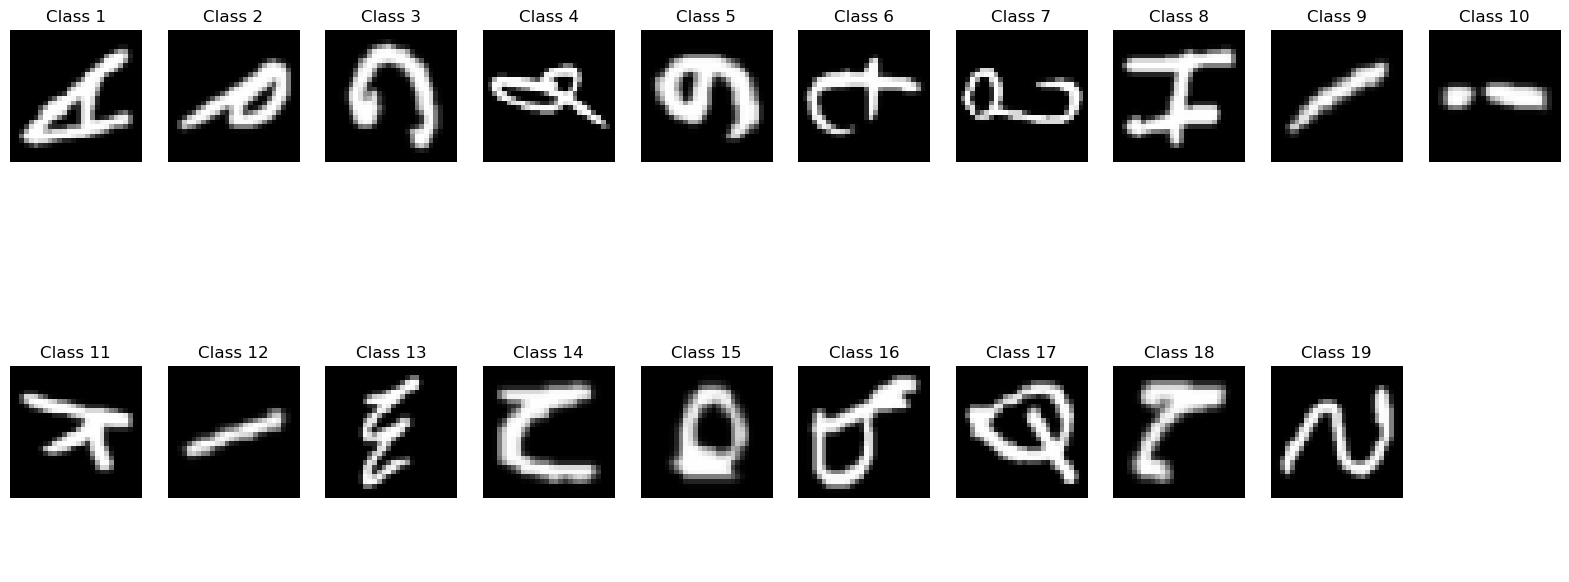

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file
emnist_data = pd.read_csv("C:\\Users\\DELL\\Downloads\\archive (8)\\emnist-letters-test.csv")

# Extract class labels and image data
class_labels = emnist_data.iloc[:, 0].values
image_data = emnist_data.iloc[:, 1:].values

# Normalize pixel values
image_data = image_data / 255.0

# Reshape image data to 28x28
image_data_reshaped = image_data.reshape(-1, 28, 28)

# Dictionary to store one image for each class
class_images = {}

# Iterate through each class and find the first image
unique_classes = np.unique(class_labels)
num_classes = len(unique_classes)

# Determine the number of rows and columns for subplots dynamically
num_rows = (num_classes + 9) // 10  # 10 columns, adjust as needed
num_cols = min(10, num_classes)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 8))

for i, ax in zip(unique_classes, axes.flat):
    class_image = image_data_reshaped[class_labels == i][0]
    ax.imshow(class_image, cmap='gray')
    ax.set_title(f'Class {i}')
    ax.axis('off')

# Hide empty subplots
for i in range(num_classes, num_rows * num_cols):
    axes.flat[i].axis('off')

plt.show()


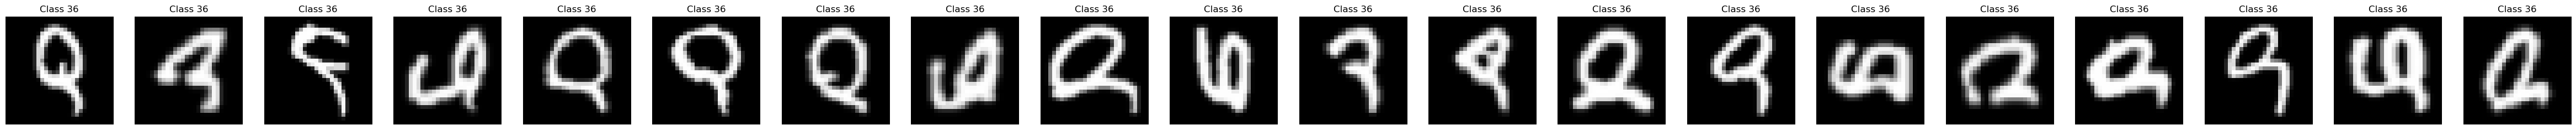

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file
emnist_data = pd.read_csv("C:\\Users\\DELL\\Downloads\\archive (8)\\emnist-balanced-test.csv")

# Extract class labels and image data
class_labels = emnist_data.iloc[:, 0].values
image_data = emnist_data.iloc[:, 1:].values

# Normalize pixel values
image_data = image_data / 255.0

# Reshape image data to 28x28
image_data_reshaped = image_data.reshape(-1, 28, 28)

# Specify the class label you want to plot more examples of
desired_class = 36  # Change this to the desired class label

# Find indices of images belonging to the desired class
class_indices = np.where(class_labels == desired_class)[0]

# Plot multiple images belonging to the desired class
num_examples = min(len(class_indices), 20)  # Plot up to 5 examples, adjust as needed
fig, axes = plt.subplots(1, num_examples, figsize=(num_examples * 3, 3))

for i, idx in enumerate(class_indices[:num_examples]):
    ax = axes[i]
    ax.imshow(image_data_reshaped[idx], cmap='gray')
    ax.set_title(f'Class {class_labels[idx]}')
    ax.axis('off')

plt.show()